In [1]:
import pandas as pd
import numpy as np
import warnings as wr 
wr.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\sultan chowdhury\\OneDrive\\Desktop\\Height-Weight1.csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [5]:
df.shape

(8555, 3)

In [6]:
row,col=df.shape

In [7]:
row

8555

In [8]:
col

3

In [9]:
df1=df.copy()

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label=LabelEncoder()

In [12]:
for col in df1.columns:
    if df1[col].dtype==np.number:
        continue
    df1[col]=label.fit_transform(df1[col])

In [13]:
df1.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [14]:
x=df1.drop('Weight',axis=1)

In [15]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [16]:
y=(df1[['Weight']])

In [17]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [20]:
xtrain.head()

,Gender,Height
553,1,67.594031
1397,1,71.601697
7934,0,62.625985
8367,0,66.136131
3320,1,71.843308


In [21]:
ytrain.head()

,Weight
553,186.751417
1397,211.031652
7934,143.768451
8367,151.814648
3320,196.505814


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
linear=LinearRegression()

In [24]:
linear.fit(xtrain,ytrain)

LinearRegression()

In [25]:
pred=linear.predict(xtest)

In [26]:
pred

array([[142.44868114],
       [186.0517281 ],
       [198.42283706],
       ...,
       [102.94080643],
       [190.83713617],
       [143.34786753]])

# MSE For Linear

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
error=mean_squared_error(ytest,linear.predict(xtest))

In [29]:
error

96.83734437830606

# Accuracy

In [30]:
linear.score(xtrain,ytrain)

0.8973793060969246

# KNN Regressor

In [31]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [32]:
knn_Reg=KNeighborsRegressor(n_neighbors=3)

In [33]:
knn_Reg.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=3)

In [34]:
knn_Reg.predict(xtest)

array([[142.5130416 ],
       [173.90630823],
       [184.6686197 ],
       ...,
       [ 95.44597987],
       [182.99507227],
       [147.37662317]])

# MSE For KNN

In [35]:
mean_squared_error(ytest,knn_Reg.predict(xtest))

135.8684592453893

# Accuracy

In [36]:
knn_Reg.score(xtrain,ytrain)

0.9304521916751347

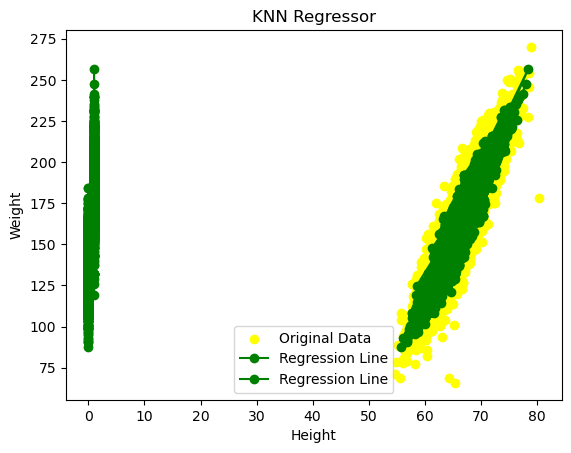

In [37]:
plt.scatter(df1['Height'],df1['Weight'],color='yellow',label='Original Data')
plt.plot(xtest,knn_Reg.predict(xtest),color='green',marker='o',label='Regression Line')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('KNN Regressor')
plt.legend()

# KNN Classifier:

In [38]:
df2=df.copy()

In [39]:
df2.head(2)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473


In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
label=LabelEncoder()

In [42]:
for col in df2.columns:
    if df2[col].dtype==np.number:
        continue
    df2[col]=label.fit_transform(df2[col])
df2.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [43]:
x=df2.drop('Gender',axis=1)

In [44]:
x.head(2)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473


In [45]:
y=(df2[['Gender']])

In [46]:
y.head()

,Gender
0,1
1,1
2,1
3,1
4,1


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [49]:
xtrain.head(2)

,Height,Weight
553,67.594031,186.751417
1397,71.601697,211.031652


In [50]:
ytrain.head(2)

,Gender
553,1
1397,1


In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
clas_value=KNeighborsClassifier()

In [53]:
clas_value.fit(xtrain,ytrain)

KNeighborsClassifier()

In [57]:
clas_value.predict(xtest)

array([0, 1, 1, ..., 0, 1, 0])

# Accuracy

In [58]:
clas_value.score(xtrain,ytrain)

0.9291917167668671